In [5]:
import math

from PIL import Image, ImageColor
import IPython.display

from Position import Position
from Piece import Piece
from Board import Board
from Game import Game
from Bot import Bot

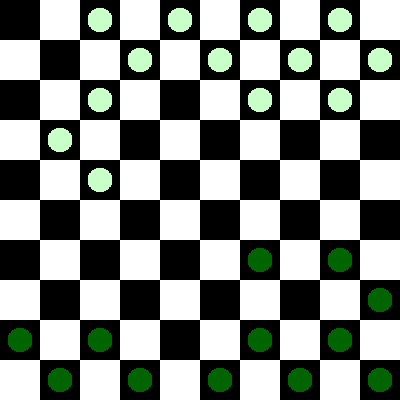

1
2
3


KeyboardInterrupt: 

In [3]:
b1 = Bot()
b2 = Bot()
game = Game(b1, b2)
game.play_bots(True)

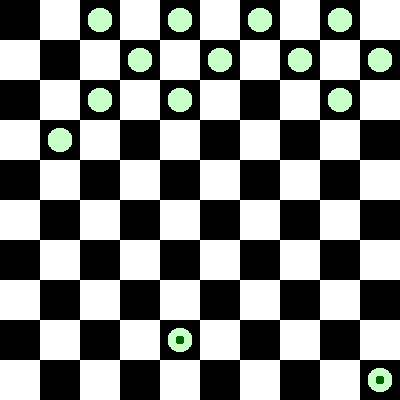

WHITE WINS


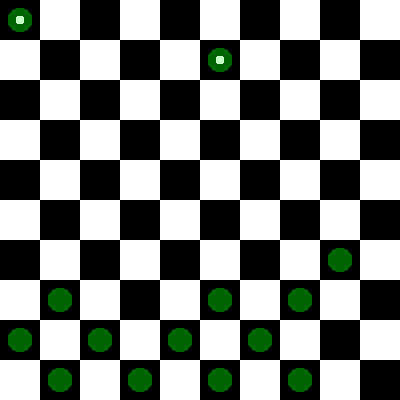

{'moves': [[{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 9}],
  [{'y': 3, 'x': 1}, {'y': 4, 'x': 2}],
  [{'y': 3, 'x': 9}, {'y': 4, 'x': 8}],
  [{'y': 4, 'x': 2}, {'y': 6, 'x': 0}],
  [{'y': 1, 'x': 7}, {'y': 2, 'x': 8}],
  [{'y': 6, 'x': 0}, {'y': 8, 'x': 2}],
  [{'y': 0, 'x': 6}, {'y': 2, 'x': 8}],
  [{'y': 1, 'x': 1}, {'y': 2, 'x': 0}],
  [{'y': 2, 'x': 6}, {'y': 3, 'x': 7}],
  [{'y': 0, 'x': 0}, {'y': 1, 'x': 1}],
  [{'y': 3, 'x': 7}, {'y': 4, 'x': 8}],
  [{'y': 2, 'x': 0}, {'y': 3, 'x': 1}],
  [{'y': 4, 'x': 8}, {'y': 5, 'x': 7}],
  [{'y': 3, 'x': 1}, {'y': 5, 'x': 3}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 5}],
  [{'y': 5, 'x': 3}, {'y': 7, 'x': 5}, {'y': 9, 'x': 3}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 3}],
  [{'y': 9, 'x': 3}, {'y': 6, 'x': 0}],
  [{'y': 0, 'x': 8}, {'y': 1, 'x': 7}],
  [{'y': 6, 'x': 0}, {'y': 9, 'x': 3}],
  [{'y': 3, 'x': 3}, {'y': 4, 'x': 2}],
  [{'y': 9, 'x': 3}, {'y': 4, 'x': 8}],
  [{'y': 0, 'x': 4}, {'y': 1, 'x': 5}],
  [{'y': 4, '

In [6]:

from Game import *

# min max bot
class CringeBot():

    def eval(self, board):

        number_of_whites = (len(board.whites) - len(board.blacks)) / (len(board.whites) + len(board.blacks))
        number_of_kings = 0
        for white in board.whites:
            if white.king:
                number_of_kings += 1
        for black in board.blacks:
            if black.king:
                number_of_kings -= 1

        value = number_of_whites + number_of_kings
        return value

    def tup(self, pos):
        return (pos.y, pos.x)

    def captures(self, board, move_so_far):
        already_captured = set()

        for i in range(len(move_so_far) - 1):
            y = (move_so_far[i].y + move_so_far[i + 1].y) // 2
            x = (move_so_far[i].x + move_so_far[i + 1].x) // 2
            already_captured.add((y, x))

        pos = move_so_far[-1]
        returning = []

        for i in [-1,1]:
            for j in [-1,1]:
                if (y + i, x + j) in already_captured:
                    continue

                if board.isBlack(pos.add(i, j)):
                    if board.isEmpty(pos.add(2*i, 2*j)):
                        new_move_so_far = [i for i in move_so_far] + [pos.add(2*i, 2*j)]
                        for q in self.captures(board, new_move_so_far):
                            returning.append(q)

        return returning

    def king_captures(self, board, pos, already_captured, move_so_far):
        moves = []
        full = True
        y, x = pos.y, pos.x
        for yd, xd in [(1, 1), (1, -1), (-1, 1), (-1, -1)]:
            for i in range(1, 10):
                if not board.on_board(Position(y + yd * i, x + xd * i)): break;

                if board.isBlack(Position(y + yd * i, x + xd * i)):
                    if board.isEmpty(Position(y + yd * (i + 1), x + xd * (i + 1))):
                        if (y + yd * i, x + xd * i) in already_captured:
                            break;
                        full = True
                        new_already_captured = set()
                        for c in already_captured:
                            new_already_captured.add(c)
                        new_move_so_far = [q for q in move_so_far] + [Position(y + yd * (i + 1), x + xd * (i + 1))]
                        new_already_captured.add((y + yd * i, x + xd * i))
                        new_moves = self.king_captures(board,
                                                    Position(y + yd * (i + 1), x + xd * (i + 1)),
                                                    new_already_captured,
                                                    new_move_so_far)
                        for move in new_moves:
                            moves.append(move)
        if full:
            if len(move_so_far) > 1:
                moves.append(move_so_far)
        return moves


    def generate_moves(self, board):
        moves = []
        if board.capture_possible():
            for white in board.whites:
                if not white.king:
                    for i in [-1, 1]:
                        if board.isBlack(white.position().add(1, i)) and board.isEmpty(white.position().add(2, 2*i)):
                            moves += [[white.position(), white.position().add(2, 2*i)]]

                else:
                    for i, j in [[1,1],[1,-1],[-1,1],[-1,-1]]:
                        multiple = 1
                        while board.isEmpty(white.position().add(i*multiple, j*multiple)):
                            multiple += 1

                        if board.isBlack(white.position().add(i*multiple, j*multiple)) and board.isEmpty(white.position().add(i*(multiple+1), j*(multiple+1))):
                            moves += [[white.position(), white.position().add(i*(multiple+1), j*(multiple+1))]]
        else:
            for white in board.whites:
                if not white.king:
                    for add in [(1,1), (1,-1)]:
                        if board.isEmpty(white.position().add(add[0], add[1])):
                            moves.append([white.position(), white.position().add(add[0], add[1])])
                else:
                    for i,j in [(1,1),(1,-1),(-1,1),(-1,-1)]:
                        for multiple in range(10):
                            if board.isEmpty(white.position().add(i,j)):
                                moves.append([white.position(), white.position().add(i,j)])
                            else:
                                break
        return moves


    # def generate_moves(self, board):
    #     moves = []
    #     if board.capture_possible():
    #         for white in board.whites:
    #             if not white.king:
    #                 for i in [-1, 1]:
    #                     if board.isBlack(white.position().add(1, i)):
    #                         if board.isEmpty(white.position().add(2, 2*i)):
    #                             capture = [white.position(), white.position().add(2, 2*i)]
    #                             moves += [capture]
    #                             moves += self.captures(board, capture)
    #             # else:
    #             #     moves += self.king_captures(board, white.position(), set(), [white.position()])
    #         for move in moves:
    #             if not board.isBlack(move[-2].middle(move[-1])):
    #                 print("!!!!!! ereror")
    #                 for p in move:
    #                     print(p.y, p.x, end= " - ")
    #                 print()
    #
    #
    #     else:
    #         for white in board.whites:
    #             for add in [(1,1), (1,-1)]:
    #                 if board.isEmpty(white.position().add(add[0], add[1])):
    #                     moves.append([white.position(), white.position().add(add[0], add[1])])
    #
    #     return moves


    def min_max(self, board, depth, max_depth, my_turn, best_value):
        if depth == max_depth:
            if my_turn:
                return self.eval(board), None
            else:
                return -self.eval(board), None
        val = -float("inf")
        best_move = None

        possible_moves = self.generate_moves(board)
        for move in possible_moves:
            if move == []: continue
            new_board = board.make_move(move)
            v, bm = self.min_max(new_board, depth + 1, max_depth, not my_turn, val)
            if v > val:
                val = v
                best_move = move

            if not my_turn and -val < best_value:
                return -val, best_move

        if my_turn:
            return val, best_move
        else:
            return -val, best_move

    def make_move(self, board):
        val, best_move = self.min_max(board, 0, 3, True, 0)
        for p in best_move:
            print(p.y, p.x, end= " - ")
        print("Cringe Move")
        return best_move

bot = Bot()
bot2 = CringeBot()
game = Game(bot, bot2)
game.play_bots(True)


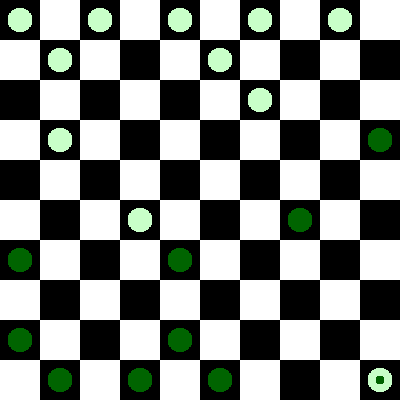

KeyboardInterrupt: Interrupted by user

In [4]:
# Suppose you have a class SampleBot and want to play againt it. Run:
bot = Bot()
game = Game(bot, None)
game.play_human(False, True)

# When you are asked to specify your move in a textfield, specify it similarly as in a bot.
# However, don't wrap the locations into Positions class or a list - just list the numbers.
# For instance, to move from position (2, 0) to position (3, 1) just type: 2 0 3 1
# Also, remember that we firstly specify the row number and then the column number
# and that the upper-left field is (0, 0)

In [ ]:
3 1 4 